### Do your imports!

In [1]:
import pandas as pd

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('subset.csv')
df.head()

/var/folders/0c/3z452hlj1pzb2yr_79hcgh8r0000gn/T/ipykernel_50865/819088522.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('subset.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


## We hate those column names!

Change the column names to be tab- and period-friendly, like `df['created_date']` instead of `df['Created Date']`.

If you have AI assistance turned on in VS Code, `df.columns = ...` will autocomplete the solution for you.

In [4]:
df = df.rename(columns={
    'Unique Key': 'unique_key',
    'Created Date': 'created_date',
    'Closed Date': 'closed_date',
    'Agency': 'agency',
    'Agency Name': 'agency_name',
    'Complaint Type': 'complaint_type',
    'Descriptor': 'descriptor',
    'Location Type': 'location_type',
    'Incident Zip': 'incident_zip',
    'Incident Address': 'incident_address',
    'Address Type': 'address_type',
    'City': 'city',
    'Status': 'status',
    'Borough': 'borough',
    'Open Data Channel': 'open_data_channel'
})

df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

Use `df.dtypes` or `df.info()` to see their data type. `object` means *string*`, not date.

In [5]:
df.dtypes

unique_key                 int64
created_date              object
closed_date               object
agency                    object
agency_name               object
complaint_type            object
descriptor                object
location_type             object
incident_zip              object
incident_address          object
address_type              object
city                      object
status                    object
borough                   object
Open Data Channel Type    object
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

```py
df['datetime_column'] = pd.to_datetime(df['datetime_column'])
# OR
df['datetime_column'] = pd.to_datetime(df['datetime_column'], format="%Y-%M-%d")
```

You use the `format=` option to demand a specific format, but you don't always need to do it. Look at [strftime.org](https://strftime.org/) or ask ChatGPT how to use it.

There's also an `errors=` option that allows to deal with errors in several ways (like stop vs ignore).

In [26]:
df['created_date'] = pd.to_datetime(df['created_date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

In [27]:
df['closed_date'] = pd.to_datetime(df['closed_date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

In [28]:
df.dtypes
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,Open Data Channel Type
0,41694420,2019-01-27 19:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,2019-02-13 15:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,2019-02-13 13:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


## There are two major ways of doing analysis with datetime data.

One uses `.dt`, the other uses `.resample`. This one below is two ways of working with the *month*.

```py
# Count the number of times each day (0-31) appears
# It's the "mega day," all days combined into one no
# matter what month or year they came from
df['colname'].dt.day.value_counts()

# Count the number of times each day (2024-11-01, 2024-11-02, 2024-11-03)
# appears. It's the "individual day," each day being kept separately.
df.resample('D', on='colname').size()
```

- `.dt` includes things like day, hour, month, week of the year, etc.
- `.resample` has a lot of codes I never remember. `D` is day, of course, `Q` is quarter. You can probably guess the ones we need below.

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021." You used one of the options mentioned above: why did you pick that approach?

In [51]:
(
    df['created_date']
    .dt.month_name()
    .value_counts()
    .sort_values()
    .head(1)
)

## The month with the most 311 calls is June

## Here it makes sense to use '.dt' because we want to group only by our specific characteristic (in this case month), not each individual month in each individual year

created_date
December    2018866
Name: count, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

Remember to sort it afterwards!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [52]:
# (
#     df['created_date']
#     .dt.strftime('%B %Y')
#     .value_counts()
#     .sort_values(ascending=False)
#     .head(1)
# )

## I got the above code '.dt.strftime()' from here https://stackoverflow.com/questions/57033657/how-to-extract-month-name-and-year-from-date-column-of-dataframe
## The benefit of it is that it returns the labels in the value_count as nicely formatted dates

(
    df.resample('M', on='created_date')
    .size()
    .sort_values(ascending=False)
    .head(1)
)

## The month/year with the most calls is August 2020 (2020-08-31)

## I used '.resample' in this case because we wanted to aggregate by month, within the context of the other date characterstics we have (we wanted each month of each year, and '.resample' does that better than '.dt')

/var/folders/0c/3z452hlj1pzb2yr_79hcgh8r0000gn/T/ipykernel_50865/428181952.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='created_date')


created_date
2020-08-31    309737
dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

* Set the y-axis to start at 0

Once you do the calculation you can most likely throw `.plot()` on it. Be sure to check your axis to make sure it makes sense.

<Axes: xlabel='created_date'>

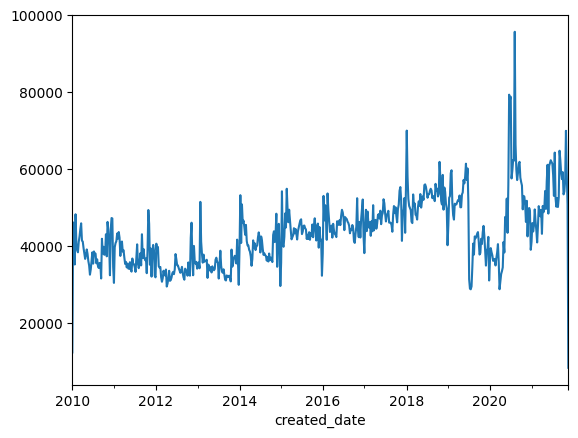

In [57]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other
(
    df.resample('W', on='created_date')
    .size()
    .plot()
)

## What time of day (by hour) is the least common for 311 complains? The most common?


In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [66]:
(
    df['created_date']
    .dt.hour
    .value_counts()
    .sort_values()
    .head(1)
)

## The least common time of day for 311 complaints is 4am

## I used '.dt.hour' in this case because I wanted to aggregated all calls in the same hour on different days together. Using '.resample' would have returned each disctinct hour of each distinct day in the dataset.

created_date
4    197293
Name: count, dtype: int64

In [72]:
(
    df['created_date']
    .dt.hour
    .value_counts()
    .sort_values(ascending=False)
)

## The most common time of day for 311 complaints (seemingly by far) is midnight. Like 16% of all calls are from midnight.

created_date
0     4417910
12    1717217
11    1625022
10    1618244
14    1480009
9     1477565
13    1453583
15    1386741
16    1263792
22    1070324
8     1063874
17    1052365
21    1012606
18    1005547
23     991731
19     956681
20     950367
7      641727
1      547781
2      362348
6      356715
3      242543
5      206896
4      197293
Name: count, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Set the y-axis to start at 0
* Give your plot a descriptive title

<Axes: xlabel='created_date'>

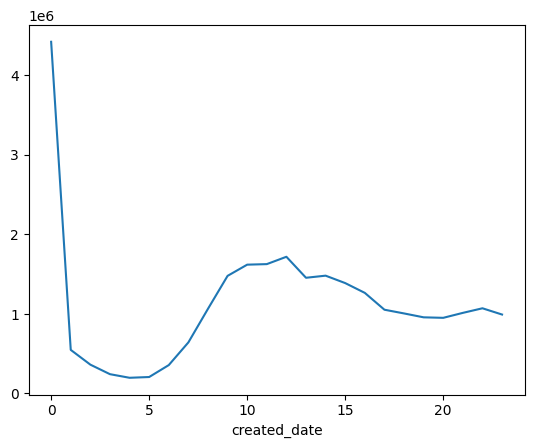

In [75]:
(
    df['created_date']
    .dt.hour
    .value_counts()
    .sort_index()
    .plot()
)

[Text(0.5, 1.0, 'Hourly Distribution of 311 Calls'),
 Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Count (in millions)')]

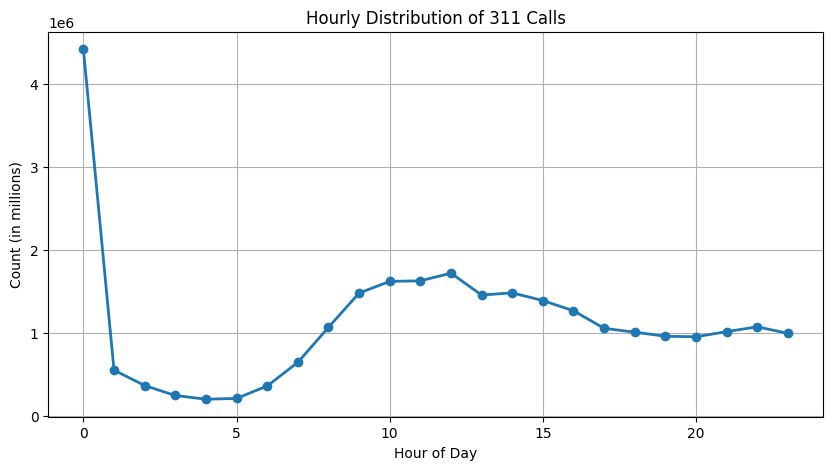

In [ ]:
## The above chart is fine, but I wanted something nicer to look at. I used my friend ChatGPT to help me learn some new options to make my chart nicer
## Convo here: https://chatgpt.com/share/6923bb5b-1988-8003-b3d6-8b6047ba49b1

(
    df['created_date']
    .dt.hour
    .value_counts()
    .sort_index()
    .plot(figsize=(10,5),
          marker='o',
          linewidth=2,
          grid=True)
    .set(title="Hourly Distribution of 311 Calls",
         xlabel="Hour of Day",
         ylabel="Count (in millions)")
)


# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

[Text(0.5, 1.0, 'Count of top 5 agencies with most 311 calls'),
 Text(0.5, 0, 'count (in millions)'),
 Text(0, 0.5, 'Agency')]

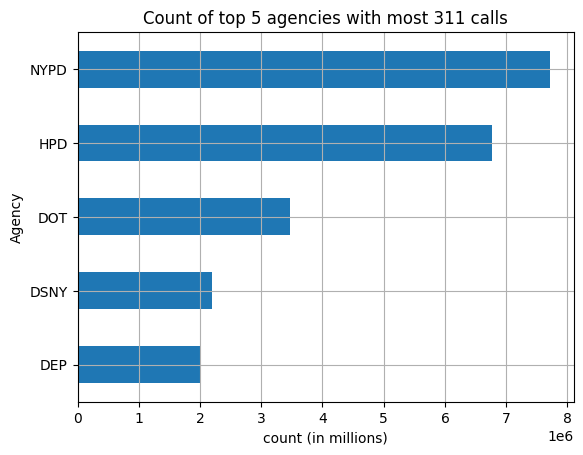

In [87]:
(
    df['agency']
    .value_counts()
    .sort_values(ascending=False)
    .head(5)
    .sort_values()
    .plot(kind='barh',
          grid=True)
    .set(title="Count of top 5 agencies with most 311 calls",
         xlabel="count (in millions)",
         ylabel="Agency")
)

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [ ]:
## NYPD = New York Police Department (police duties, responds to crime)
## HPD = Housing Preservation & Development (manages housing and enforces housing laws)
## DOT = Department of Transportation (oversees travel conditions, including potholes, streetlights, roads, bridges)
## DSNY = New York City Department of Sanitation (manages waste, street sweeping, etc)
## DEP = Department of Environmental Protection (oversees city's water supply, response to issues with air and noise pollution)

## What is the most common complaint to HPD?

In [95]:
# Why did you pick these columns to calculate the answer?

## I picked 'complaint_type' to answer my question because it seemed like the more general of the two options (there is also 'descriptor'). I wanted to know generally what the most common complaint types were, then I could, for instance, look specifically at the descriptors for heat/hot water complaints to HPD.

df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,Open Data Channel Type
0,41694420,2019-01-27 19:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,2019-02-13 15:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,2019-02-13 13:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


In [96]:
(
    df[df['agency'] == 'HPD']
    ['complaint_type']
    .value_counts()
    .sort_values(ascending=False)
    .head()
)

## The most common complaint type to HPD is 'Heat/Hot Water'.

complaint_type
HEAT/HOT WATER          1545205
HEATING                  887869
PLUMBING                 777856
UNSANITARY CONDITION     565403
GENERAL CONSTRUCTION     500863
Name: count, dtype: int64

## What are the top 3 complaints to each agency?

This is something I will never ever memorize and will always rely on AI to generate for me.

In [98]:
(
    df.groupby('agency')
    ['complaint_type']
    .value_counts()
    .groupby(level=0)
    .head(3)
)

agency  complaint_type                
3-1-1   Noise Survey                       16301
        City Vehicle Placard Complaint      2393
        OEM Disabled Vehicle                1872
ACS     Forms                               1219
        Damaged Tree                           1
                                           ...  
TAX     Question                             430
        Comments                              31
TLC     Taxi Complaint                    176656
        For Hire Vehicle Complaint         76643
        Lost Property                      14850
Name: count, Length: 74, dtype: int64

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

Before you find the subtypes, you need to find the noise complaints. How are you going to find the noise-related complaints?

In [ ]:
# Why did you pick these columns to calculate the answer?

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

## When do people party hard?

Make a chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

If you get zero matches - think about `BEES!!` vs `bees` vs `Bees`.

### What month do most of the complaints happen in? I'd like to see a graph.

### Are the people getting investigated usually beekeepers or not beekeepers?

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Save it as a new column called `time_to_fix`. I have faith that you can guess how to calculate it. You can guess! I promise!

## Which agency has the best time-to-fix time?

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)